In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
# Image processing
import matplotlib.pyplot as plt
import seaborn as sns
import imageio
import skimage
import skimage.io
import skimage.transform
from imageio import imread

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers.normalization import BatchNormalization
from keras.callbacks import ModelCheckpoint, Callback, EarlyStopping, ReduceLROnPlateau

print(os.listdir('../input/nonsegmentedv2/'))
directory=os.listdir('../input/nonsegmentedv2/')
# Any results you write to the current directory are saved as output

Using TensorFlow backend.


['Fat Hen', 'Black-grass', 'Cleavers', 'Small-flowered Cranesbill', 'Sugar beet', 'Common Chickweed', 'Maize', 'Shepherd’s Purse', 'Loose Silky-bent', 'Common wheat', 'Scentless Mayweed', 'Charlock']


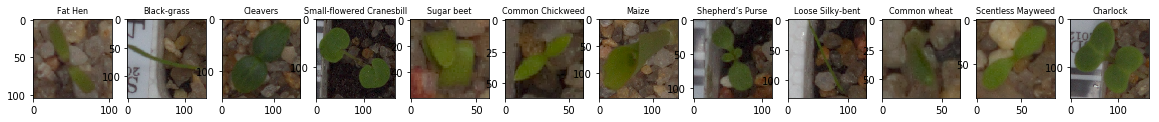

In [2]:
f, ax = plt.subplots(nrows=1,ncols=12, figsize=(20, 10))
i=0
for d in directory:
    file='../input/nonsegmentedv2/'+d+'/1.png'
    im=imageio.imread(file)
    #print(im,imread(img_file).shape)
    #f, ax = plt.subplots(figsize=(12,5))
    ax[i].imshow(im,resample=True)
    ax[i].set_title(d, fontsize=8)
    i+=1


In [3]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        '../input/nonsegmentedv2/',
        target_size=(64,64),
        batch_size=32,
        class_mode='categorical',
        subset='training')

validation_generator = train_datagen.flow_from_directory(
        '../input/nonsegmentedv2/',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='validation')

input_shape=(64,64,3)
num_classes=12

Found 4437 images belonging to 12 classes.
Found 1102 images belonging to 12 classes.


In [4]:
model = Sequential()
model.add(Conv2D(32,(3, 3),
                 activation='relu',
                 input_shape=input_shape))
#model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [5]:
# We'll stop training if no improvement after some epochs
earlystopper1 = EarlyStopping(monitor='loss', patience=10, verbose=1)

# Save the best model during the traning
checkpointer1 = ModelCheckpoint('best_model1.h1'
                                ,monitor='val_acc'
                                ,verbose=1
                                ,save_best_only=True
                                ,save_weights_only=True)

In [6]:
training=model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=20,
        validation_data = validation_generator, 
        validation_steps = 30,
        callbacks=[earlystopper1, checkpointer1]
       )

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
100/100 [==============================] - 80s 795ms/step - loss: 1.8005 - acc: 0.4191 - val_loss: 2.5553 - val_acc: 0.3208

Epoch 00001: val_acc improved from -inf to 0.32083, saving model to best_model1.h1
Epoch 2/20
100/100 [==============================] - 72s 724ms/step - loss: 1.1899 - acc: 0.5884 - val_loss: 1.2592 - val_acc: 0.5913

Epoch 00002: val_acc improved from 0.32083 to 0.59130, saving model to best_model1.h1
Epoch 3/20
100/100 [==============================] - 72s 717ms/step - loss: 0.9878 - acc: 0.6785 - val_loss: 1.5837 - val_acc: 0.5223

Epoch 00003: val_acc did not improve from 0.59130
Epoch 4/20
100/100 [==============================] - 71s 709ms/step - loss: 0.8711 - acc: 0.7084 - val_loss: 1.3433 - val_acc: 0.5594

Epoch 00004: val_acc did not improve from 0.59130
Epoch 5/20
100/100 [==============================] - 72s 724ms/step - loss: 0.7394 - acc: 0.7628 - val_loss: 1.3922 - val_acc: 0.6242

Epo

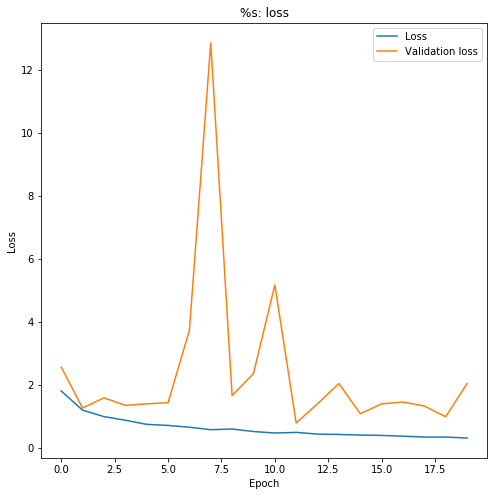

In [7]:
plt.rcParams['figure.figsize'] = (8, 8)

plt.plot(training.history['loss'], label="Loss")
plt.plot(training.history['val_loss'], label="Validation loss")
plt.title('%s: loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
    
